In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values, t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values
data=np.delete(data, 100, axis=0)

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=log_dat_x

In [18]:
max_x=np.max(x_train, axis=0)

In [19]:
x_train=x_train/ max_x

In [20]:
y_train=log_dat_y

In [21]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [22]:
nb_epochs = 2000
model=nn.Linear(6,1)
val=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    regularity =  torch.norm(model.weight, p=1)
    loss = F.mse_loss(prediction, y_train)
    cost = loss + val*regularity
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, nb_epochs, cost.item()
          ))

Epoch    0/2000 Cost: 4.062130
Epoch  100/2000 Cost: 0.379836
Epoch  200/2000 Cost: 0.199751
Epoch  300/2000 Cost: 0.120507
Epoch  400/2000 Cost: 0.079429
Epoch  500/2000 Cost: 0.057699
Epoch  600/2000 Cost: 0.045995
Epoch  700/2000 Cost: 0.039674
Epoch  800/2000 Cost: 0.036260
Epoch  900/2000 Cost: 0.034415
Epoch 1000/2000 Cost: 0.033418
Epoch 1100/2000 Cost: 0.032880
Epoch 1200/2000 Cost: 0.032589
Epoch 1300/2000 Cost: 0.032431
Epoch 1400/2000 Cost: 0.032346
Epoch 1500/2000 Cost: 0.032300
Epoch 1600/2000 Cost: 0.032276
Epoch 1700/2000 Cost: 0.032262
Epoch 1800/2000 Cost: 0.032255
Epoch 1900/2000 Cost: 0.032251
Epoch 2000/2000 Cost: 0.032249


In [23]:
x=np.squeeze(model(x_train).detach().numpy())

In [24]:
y=y_train.detach().numpy()

MSE: 0.02433290146291256
RMSE: 0.155990068475248
Percentage error: 19.671454201244053 %


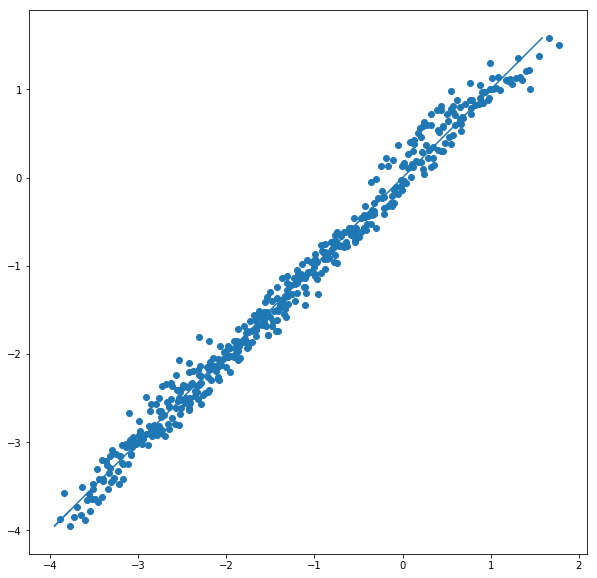

In [25]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')

In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-1.5663, -0.3747, -0.2538, -0.0833, -0.6783, -4.9597]],
       requires_grad=True), Parameter containing:
tensor([4.3735], requires_grad=True)]


In [27]:
eval_dat=pd.read_excel("./evaluate_data.xlsx")

In [28]:
t2_dat=eval_dat.loc[:,"# of turns":"HFSS"]
t3_dat=eval_dat.loc[:,"# of turns.1":"HFSS.1"]
t4_dat=eval_dat.loc[:,"# of turns.2":"HFSS.2"]
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)
total_dat_temp=np.vstack([t2_dat.values, t3_dat.values,t4_dat.values])
del_index=np.where(total_dat_temp[:,6]==0)[0]
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)
total_eval=total_dat_temp.drop(del_index)
total_eval=total_eval.values
total_eval=np.delete(total_eval, 100, axis=0)
log_dat_x=np.log(total_eval[:,:6])
x_test=log_dat_x
x_test=x_test/ max_x
x_test=torch.FloatTensor(x_test)

In [29]:
y_test=total_eval[:,6]

In [30]:
x=np.squeeze(model(x_test).detach().numpy())
predicted=np.exp(x)

In [31]:
predicted=np.exp(x)
HFSS=data[:,6]

MSE_Predicted: 0.0022508413024602486
RMSE_Predicted: 0.04744303218029228
Percentage error_Predicted: 10.970573808080857 %


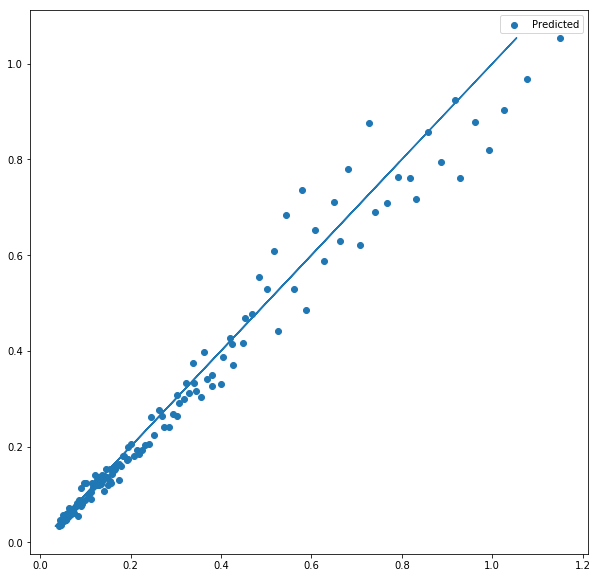

In [32]:
plt.figure(figsize=(10,10))
plt.plot(y_test,y_test)
plt.scatter(predicted, y_test,label='Predicted')
plt.legend()
plt.show
mse_ls=np.linalg.norm(predicted-y_test)**2/len(y_test)
print('MSE_Predicted:',np.linalg.norm(predicted-y_test)**2/len(y_test))
print('RMSE_Predicted:', np.sqrt(np.linalg.norm(predicted-y_test)**2/len(y_test)))
print('Percentage error_Predicted:', np.sum(np.abs(predicted-y_test)/y_test)/len(y_test)*100,'%')

In [33]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-1.5663, -0.3747, -0.2538, -0.0833, -0.6783, -4.9597]],
       requires_grad=True), Parameter containing:
tensor([4.3735], requires_grad=True)]


In [34]:
print("Scaled value: ",max_x)
theta=np.array([-1.5667, -0.3747, -0.2540, -0.0834, -0.6785, -4.9600])/max_x
print("Theta: ",theta)
print("alpha: ",list(model.parameters())[1][0].detach().numpy())

Scaled value:  [ 1.38629436  3.91202301 -1.2039728  -0.51082562  2.07944154  3.4657359 ]
Theta:  [-1.13013516 -0.09578165  0.21096822  0.16326511 -0.32628953 -1.43115348]
alpha:  4.3735495


In [35]:
y_val=np.dot(np.log(total_eval[:,:6]),theta)+4.3745

MSE_Predicted: 0.0022516160389186336
RMSE_Predicted: 0.04745119639080382
Percentage error_Predicted: 10.964200220568861 %


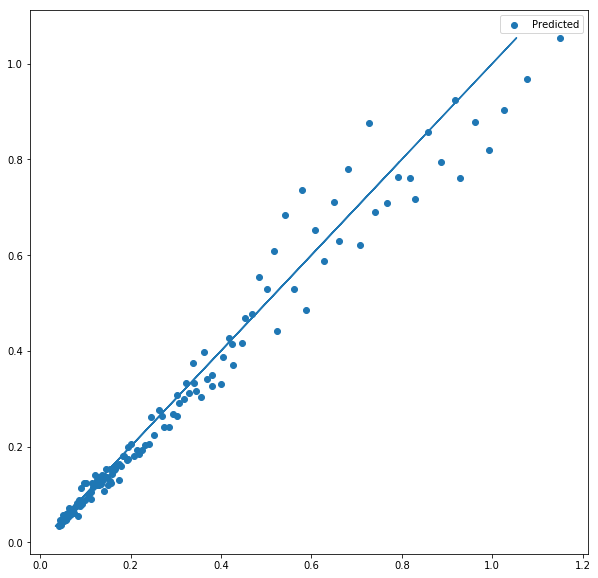

In [36]:
plt.figure(figsize=(10,10))
plt.plot(y_test,y_test)
plt.scatter(np.exp(y_val), y_test,label='Predicted')
plt.legend()
plt.show
predicted=np.exp(y_val)
print('MSE_Predicted:',np.linalg.norm(predicted-y_test)**2/len(y_test))
print('RMSE_Predicted:', np.sqrt(np.linalg.norm(predicted-y_test)**2/len(y_test)))
print('Percentage error_Predicted:', np.sum(np.abs(predicted-y_test)/y_test)/len(y_test)*100,'%')